# Examen final

Profesor: [Carlos Adrian Alarcon](https://www.linkedin.com/in/carlos-adrian-alarcon-delgado/)

Bienvenidos a su examen final.

Ahora pondrán a prueba sus conocimientos en analítica predictiva y, al finalizar, estoy muy seguro que se sentirán data scientists consolidados. Recuerden aplicar los conocimientos y recursos que hemos visto a lo largo del curso 

## Contexto y caso de uso

Ustedes son dueños de un restaurante y quieren analizar qué tan contentos están sus clientes con su servicio, por lo que deciden entrenar un modelo para identificar si una persona está triste o está feliz a partir de las imagenes. El dataset lo podrán encontrar [acá](https://www.kaggle.com/datasets/eneskosar19/happy-or-sad-binary-image-classification). Les voy a proveer el código para que puedan correrlo sin problema y puedan tener las imágenes como `array` de `numpy` para que puedan centrarse en su modelo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Definir el directorio base donde están las carpetas de imágenes
base_dir = 'data'

# Tamaño al que se redimensionarán las imágenes
img_size = (64, 64)  # Todas las imágenes se redimensionarán a 64x64

# Función para cargar imágenes y etiquetas
def load_images_and_labels(base_dir, img_size):
    images = []
    labels = []
    for label, folder in enumerate(['happy_person_face', 'sad_person_face']): ## Las carpetas que contienen las imágenes deben estar en carpetas con estos nombres
        folder_path = os.path.join(base_dir, folder)
        for file in os.listdir(folder_path):
            if file.endswith(('jpg', 'jpeg', 'png')):
                img_path = os.path.join(folder_path, file)
                img = load_img(img_path, target_size=img_size)  # Redimensionar al cargar
                img = img_to_array(img)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Cargar datos
images, labels = load_images_and_labels(base_dir, img_size)

# Normalizar imágenes
images = images / 255.0

# Convertir etiquetas a formato categórico
labels = to_categorical(labels)

# Dividir los datos en test y train (revisar los shape)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


## Pregunta 1: Calentamiento (3 ptos)

Tienes que entrenar un modelo de `multilayer perceptron`, o redes neuronales simples para predecir si es que una persona está feliz o no. El número de capas, el optimizador y las epochs las defines tú. Solo tienes que hacer el entrenamiento

In [10]:
### MODELO DNN
## Lo primero que hice fue instalar tensorflow en mi PC
## Luego las importaciones necesarios

from tensorflow.keras import models, layers
import keras
from sklearn.metrics import accuracy_score


model = models.Sequential([
    layers.Flatten(input_shape=(64, 64, 3)), # Esto ya es dato (variable img_size)
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1000, activation='relu'), 
    layers.Dense(2, activation='softmax')   # 2 neuronas para las 2 clases: feliz y triste
])


# Compilar el modelo
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',  # ( Función de pérdida ) Cambiado a categorical pero podría funcionar con sparse_categorical_crossentropy
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=5) # 5 iteraciones

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4886 - loss: 0.6904  
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4700 - loss: 0.6948 
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6282 - loss: 0.6746 
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5763 - loss: 0.6619 
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5818 - loss: 0.6588 


## Pregunta 2: Entrada (2 ptos)

Evalúa el modelo con el dataset de test mostrando claramente la matriz de confusión, el accuracy, la sensibilidad y la especificidad. Además, muestra la curva `ROC` junto con el `AUC` correspondiente. Interpreta las métricas e indica si es un **buen** modelo

In [13]:
# Predicciones
predictions = model.predict(x_test)

# Convertir probabilidades a etiquetas de clase
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


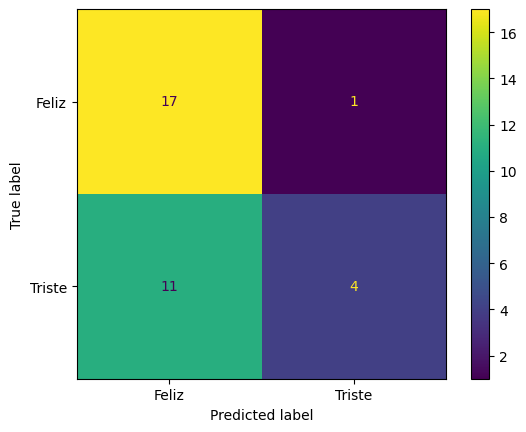

Accuracy: 0.6363636363636364
Sensibilidad: 0.26666666666666666
Especificidad: 0.9444444444444444


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, auc

# Matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Feliz', 'Triste']) # Sólo debemos considerar esos dos valores
disp.plot()
plt.show()

# Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy}")

# Sensibilidad y especificidad
TN, FP, FN, TP = cm.ravel()
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")


Accuracy: 0.6363636363636364  -> No es excepcionalmente alto, lo que sugiere que hay margen significativo de mejora (63%).
Sensibilidad: 0.26666666666666666 -> Una sensibilidad de 26.7% indica que el modelo solo pudo identificar correctamente aproximadamente el 26.7% de los casos verdaderamente "felices". 
Especificidad: 0.9444444444444444 -> Una especificidad de 94.4% es bastante alta.

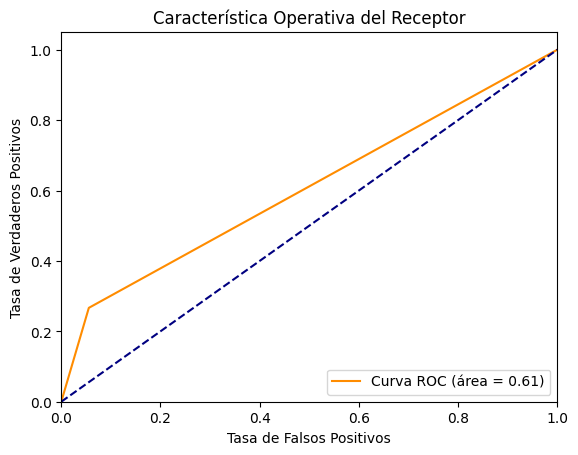

AUC: 0.6055555555555555


In [24]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

probabilidades = []
for i in range(predictions.shape[0]):
  probabilidades.append(np.argmax(predictions[i,:]))
  
# ROC y AUC
fpr, tpr, thresholds = roc_curve(true_classes, probabilidades)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC 
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica Operativa del Receptor')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")


Un AUC de 0.60555 indica un buen rendimiento general del modelo, mientras que un AUC de 1.0 representa un modelo perfecto. 

## Pregunta 3: Entrada parte II (2 ptos)

Entrena ahora cualquier modelo de boosting. Manipula los hiperparámetros para el entrenamiento no te tome tanto tiempo. Genera las predicciones con test y comparalo con la red neuronal. Establece conclusiones en base a los resultados e indica, para datos de alta dimensionalidad, qué clase de modelos son mejores, los de machine learning tradicional, o los de redes neuronales.

In [ ]:
### Escribe tu código acá

Escribe tu respuesta teórica aquí

## Pregunta 4: Un poco de teoría (3 ptos)

Escribe, de manera precisa, cómo deberían ser los inputs para una red neuronal de tipo `multilayer perceptron` o de campas densas. Indica claramente el tipo de preprocesamiento que debe tener y las consideraciones en cuanto a outliers y valores nulos. Responde si es posible tener outliers en el caso de imágenes y, en todo caso, de serlo, cómo poder solucionarlo

Escribe tu respuesta teórica aquí

## Pregunta 5: Plato de fondo (4 ptos)

Ahora entrena una red neuronal convolucional. El número de capas, tamaño de kernel, optimizador, epochs y neuronas los decides tú, solamente asegúrate de que no te tome tanto tiempo el entrenamiento. Solamente entrena el modelo

In [ ]:
### Escribe tu código acá

## Pregunta 6: Sobremesa (3 ptos)

Evalúa el modelo con el dataset de test mostrando claramente la matriz de confusión, el accuracy, la sensibilidad y la especificidad. Además, muestra la curva `ROC` junto con el `AUC` correspondiente. Interpreta las métricas e indica si es un **buen** modelo. Comparalo con los otros dos modelos e indica cuál es mejor

In [ ]:
### Escribe tu código acá

## Pregunta 7: Algo más de teoría (1 ptos)

Indica las diferencias entre una red neuronal multicapa (`multilayer perceptron`) y una red neuronal convolucional. Indica claramente cuáles son las ventajas y desventajas de cada una de estas y en qué se especializan

Escribe tu respuesta aquí

## Pregunta 8: Postre (2 ptos)

Indica los problemas que tienen las redes neuronales en general, comparadas con otros modelos como los de boosting, cómo evitarlos y dentro de qué tipo de aprendizaje se encuentran las redes neuronales. Explica, además, el concepto de gradiente descendente y muestra un ejemplo con una función exponencial (usa `Gurobi`)

In [ ]:
### Escribe tu código acá

Escribe tu respuesta teórica aquí